IMPORTING LIBRARIES 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [50]:

bank = pd.read_csv(r'C:\Users\Omar-\Downloads\BankChurners.csv\BankChurners.csv')

In [51]:
bank.head(50)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.999940
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.999880
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.999910
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.999960
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.999700


In [52]:
#EDA to detect missing values
for col in bank.columns:
    print(bank[col].value_counts())


CLIENTNUM
768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: count, Length: 10127, dtype: int64
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Customer_Age
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64
Education_Level
Graduate         3128
High Scho

In [53]:
# Count how many duplicate rows exist
duplicate_count = bank.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


In [54]:
unknown_income= bank[bank['Income_Category'] == 'Unknown']
unknown_income

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,...,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,...,10100.0,0,10100.0,0.525,1052,18,1.571,0.000,0.000121,0.999880
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.997800,0.002197
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,...,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209,0.000317,0.999680
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,...,6273.0,978,5295.0,2.275,1359,25,1.083,0.156,0.000057,0.999940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,...,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575,0.993300,0.006700
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,...,5173.0,0,5173.0,0.912,8757,68,0.789,0.000,0.997800,0.002196
10083,718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,...,8348.0,0,8348.0,0.695,15905,111,0.708,0.000,0.000059,0.999940
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,...,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273,0.994990,0.005010


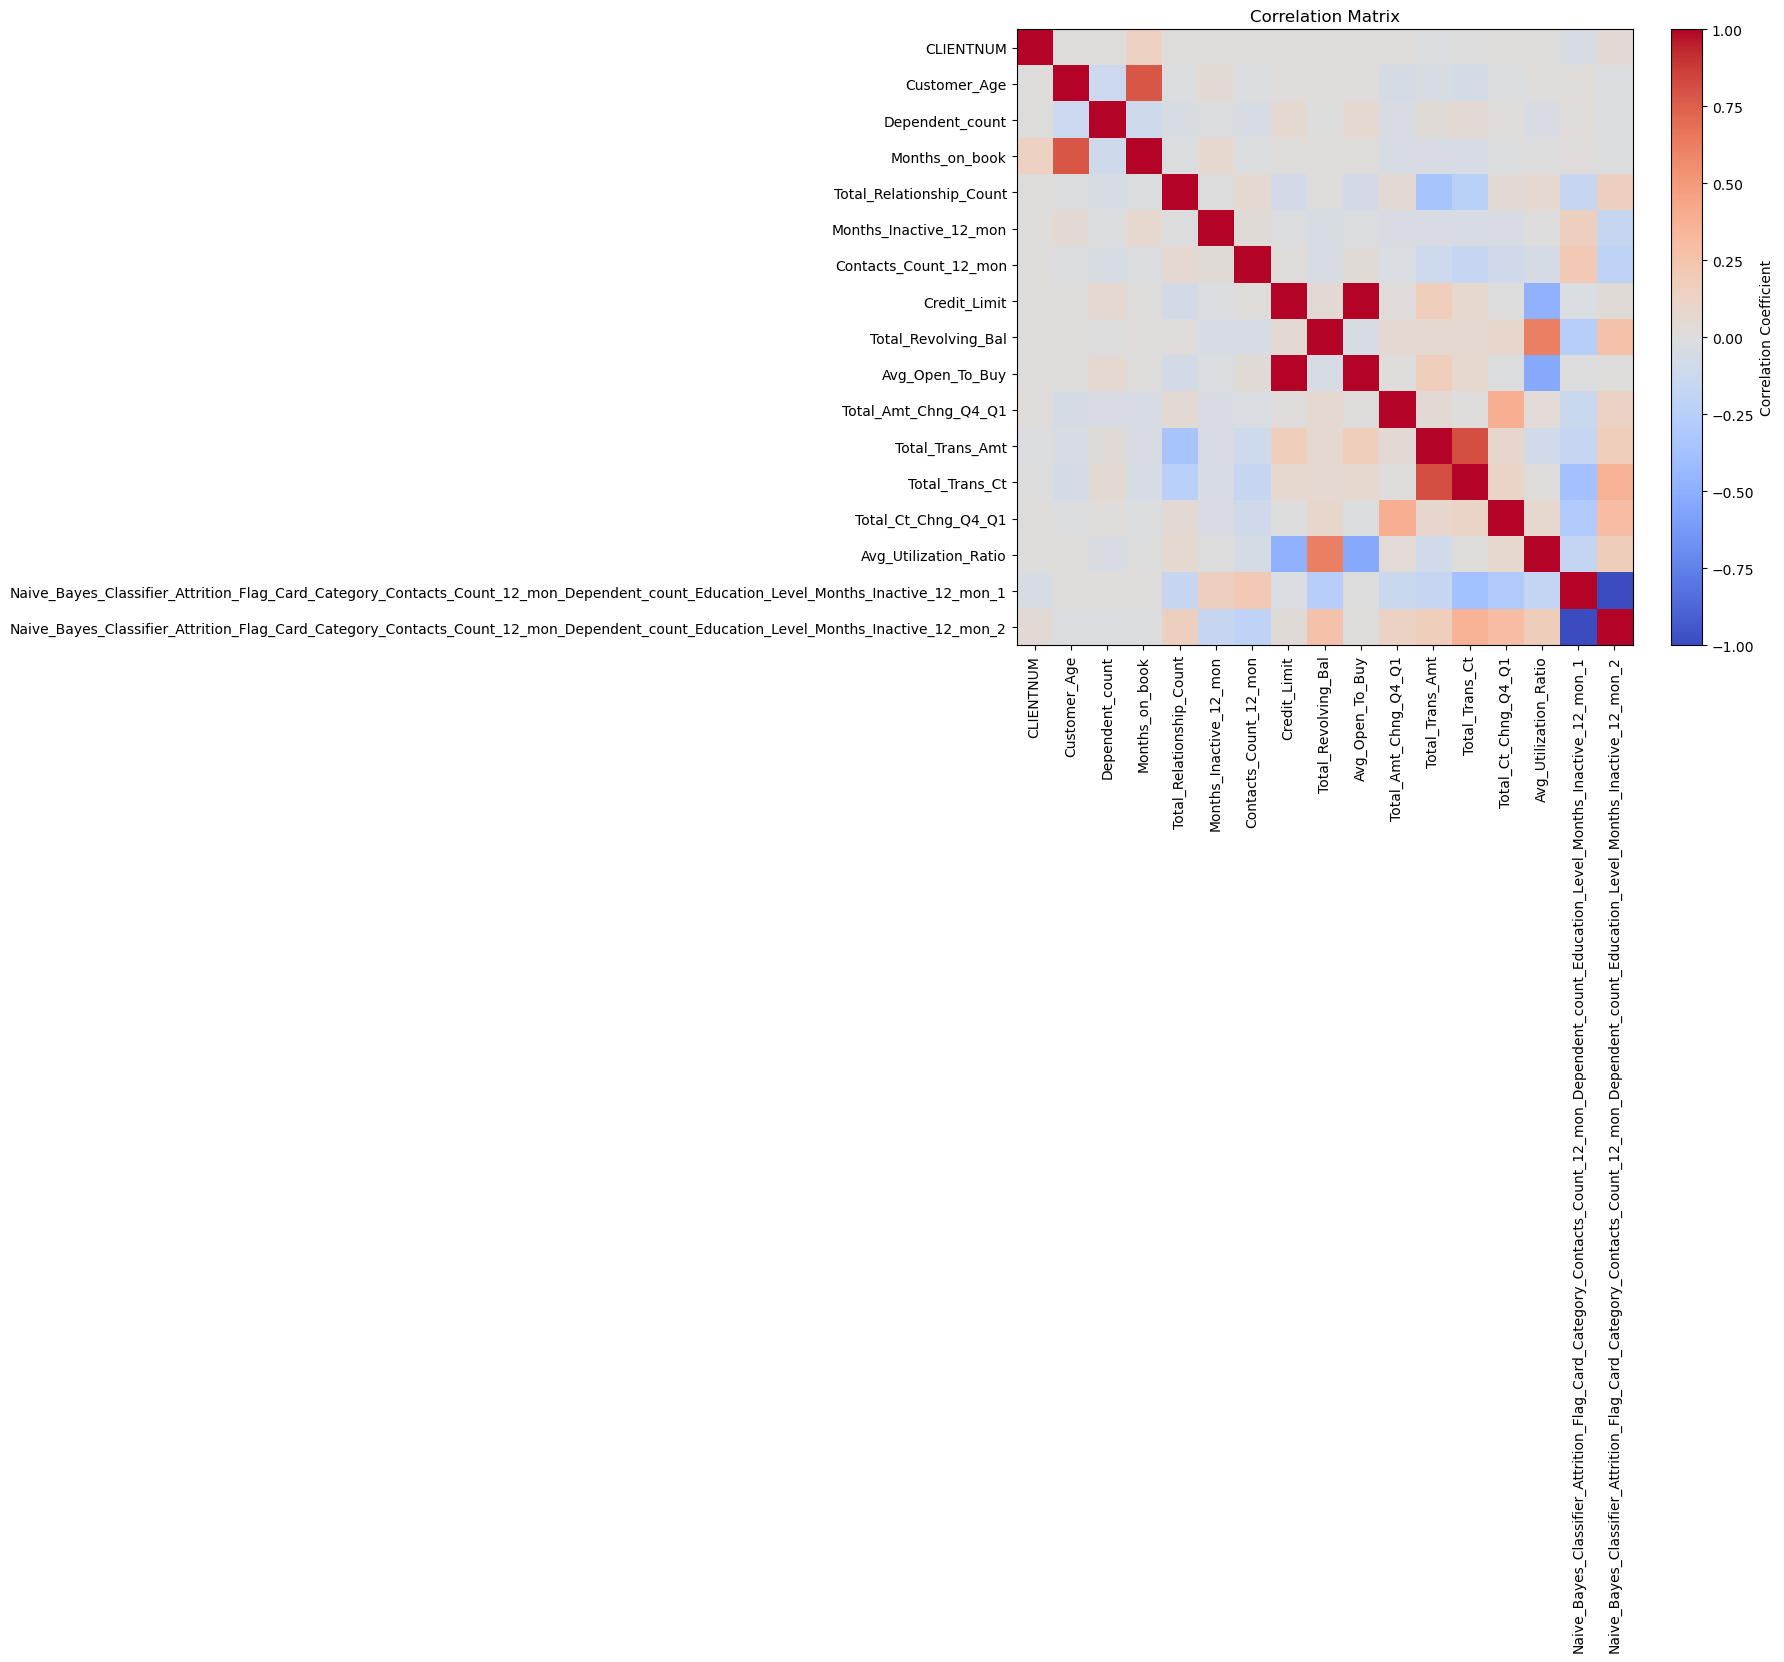

In [55]:
# Compute correlation matrix
corr_matrix = bank.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
# Plot with matplotlib

plt.show()

In [56]:
#remove unneccessary columns.
bank.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


In [57]:
 #check to see relation between income & credit limit
bank[bank['Income_Category'] != 'Unknown'].groupby('Income_Category')['Credit_Limit'].mean().sort_values()


Income_Category
Less than $40K     3754.404521
$40K - $60K        5462.259832
$60K - $80K       10758.772967
$80K - $120K      15809.890945
$120K +           19717.322558
Name: Credit_Limit, dtype: float64

In [58]:
##impute unknown income 
# Define bins and labels
bins = [0, 10000, 15000, 20000, 30000, bank['Credit_Limit'].max()]
labels = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

# Create a temporary bin column
bank['Credit_Bin'] = pd.cut(bank['Credit_Limit'], bins=bins, labels=labels)

# Map most frequent income category per bin
income_map = (
    bank[bank['Income_Category'] != 'Unknown']
    .groupby('Credit_Bin')['Income_Category']
    .agg(lambda x: x.mode()[0])
)

# Impute 'Unknown' values
mask = bank['Income_Category'] == 'Unknown'
bank.loc[mask, 'Income_Category'] = bank.loc[mask, 'Credit_Bin'].map(income_map)

bank['Income_Category'].value_counts()



C:\Users\Omar-\AppData\Local\Temp\ipykernel_19240\3324469520.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Credit_Bin')['Income_Category']


Income_Category
Less than $40K    4307
$80K - $120K      1901
$40K - $60K       1790
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [62]:
#Initiate model & 
model= LogisticRegression(class_weight='balanced')

# Convert target to binary: 1 if Attrited Customer, 0 otherwise
bank['Attrition_Flag_Binary'] = np.where(bank['Attrition_Flag'] == 'Attrited Customer', 1, 0)


# Exclude unhelpful features
X = bank.drop(columns=['CLIENTNUM', 'Attrition_Flag', 'Attrition_Flag_Binary'])

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = bank['Attrition_Flag_Binary']

#Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



#Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit the training data
model.fit(X_train_scaled,y_train)

#Predict 
predictions= model.predict(X_test_scaled)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1464  237]
 [  62  263]]
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.81      0.64       325

    accuracy                           0.85      2026
   macro avg       0.74      0.83      0.77      2026
weighted avg       0.89      0.85      0.86      2026



In [68]:
# Threshold tuning for churn prediction

# Get predicted probabilities for churn (class 1)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Set a new threshold (e.g., 0.3)
new_threshold = 0.47
predictions_new = (y_probs >= new_threshold).astype(int)

# Evaluate performance with new threshold
print(confusion_matrix(y_test, predictions_new))
print(classification_report(y_test, predictions_new))

[[1449  252]
 [  57  268]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1701
           1       0.52      0.82      0.63       325

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.77      2026
weighted avg       0.89      0.85      0.86      2026



SyntaxError: invalid syntax (2642276387.py, line 1)